In [1]:
from adabkb import SafeAdaBKB
from adabkb.options import OptimizerOptions

import numpy as np

from sklearn.gaussian_process.kernels import RBF

import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="darkgrid")

[0.0]


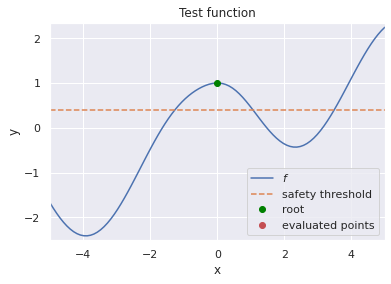

In [2]:

f = lambda x:  np.cos(x) + np.tanh(x) - np.sin(x)


jmin = 0.4
def plot_fun(f, points, lims=[-10, 11]):
    root = points[0]
    points = points[:-1]
    fig, ax = plt.subplots()
    X = np.linspace(lims[0], lims[1], 100)
    y = f(X)
    ax.plot(X, y, '-', label="$f$")
    ax.plot(X, [jmin for _ in range(X.shape[0])], '--', label="safety threshold")
    ax.plot(root, f(root), 'o', c="green", ms=6,label="root")
    ax.plot(points, [f(x) for x in points], 'ro', ms=6,label="evaluated points")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim([X.min(), X.max()])
    ax.set_ylim([y.min() - 0.1, y.max() + 0.1])
    ax.legend(loc="lower right")
    ax.set_title("Test function")

def plot_average_regret(avg_reg):
    fig, ax = plt.subplots()
    ax.set_title("Average Regret")
    ax.set_xlabel("$t$")
    ax.set_ylabel("$R_T$")
    ax.plot(range(len(avg_reg)), avg_reg, '-', label="average regret")
    ax.legend(loc="upper right")

lims = [-5.0, 5.0]
points = [np.mean(lims)]
print(points)
plot_fun(f, points, lims)


	unsafe=False	lcb:1.0077625561544006	jmin:0.4
[--] lcb: 1.012626433302893	 j_min: 0.4
[--] xt: [0.10973937]	 yt: [0.99376639]
[--] update completed in 0.024600 seconds.
[--] expanding: [2.42861287e-16]	h=4	unsafe=False	lcb:0.9921244122357511	jmin:0.4
[--] expanding: [-4.97942387]	h=5	unsafe=True	lcb:-1.016176456222205	jmin:0.4
[--] expanding: [-4.9382716]	h=5	unsafe=True	lcb:-1.0166008767313734	jmin:0.4
[--] expanding: [-4.89711934]	h=5	unsafe=True	lcb:-1.0170948297179314	jmin:0.4
[--] expanding: [-4.85596708]	h=5	unsafe=True	lcb:-1.0176685560732888	jmin:0.4
[--] expanding: [4.97942387]	h=5	unsafe=True	lcb:-1.0180910142279795	jmin:0.4
[--] expanding: [-4.81481481]	h=5	unsafe=True	lcb:-1.0183335992789748	jmin:0.4
[--] expanding: [4.9382716]	h=5	unsafe=True	lcb:-1.01881899093847	jmin:0.4
[--] expanding: [-4.77366255]	h=5	unsafe=True	lcb:-1.0191029361652206	jmin:0.4
[--] expanding: [4.89711934]	h=5	unsafe=True	lcb:-1.019659076502397	jmin:0.4
[--] expanding: [-4.73251029]	h=5	unsafe=True	l

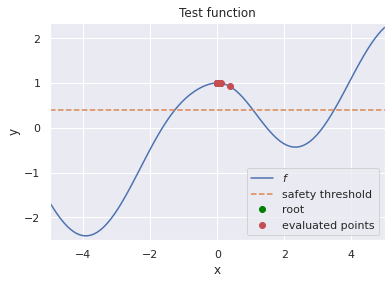

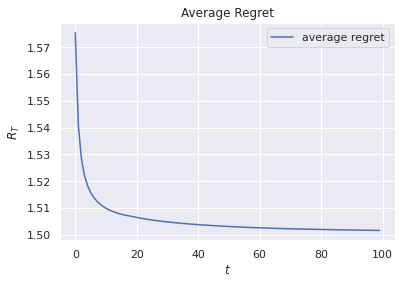

In [3]:
N = 3
sigma = 1.0
lam = 1e-5
gfun = lambda x: 1/sigma * x
v_1 = np.sqrt(N)
rho = 1/N
kernel = RBF(sigma)

lims = [-5.0, 5.0]
search_space = np.array(lims).reshape(-1, 2)
budget = 100
h_max = 7
t = 0
print("[--] jmin: {}".format(jmin))
options = OptimizerOptions(gfun, v_1 = v_1, rho=rho, lam=lam, noise_var = lam**2,\
         delta=1e-5,
         qbar= 3,
         jmin=jmin,
         verbose=True)
opt = SafeAdaBKB(kernel, options)
fun_max = 2.5
avg_reg = []
opt.initialize(f, search_space, N, budget, h_max)
while t < budget:
    xt, node_idx = opt.step()
    yt = f(xt)
    avg_reg.append(fun_max - yt)
    print("[--] xt: {}\t yt: {}".format(xt,yt))
    points.append(xt[0])
    opt.update_model(node_idx, yt)
    t+=1
avg_reg = np.cumsum(avg_reg)
avg_reg = [avg_reg[t]/(t+1) for t in range(len(avg_reg))]
plot_fun(f, points, lims)
plot_average_regret(avg_reg)


8845	jmin:0.15
[--] expanding: [0.35083008]	h=5	unsafe=True	lcb:-0.1270751285863277	jmin:0.15
[--] x: [0.30047607]	fake y: -0.1836372113089112
[--] update completed in 0.109127 seconds.
[--] lcb: 0.15599567654694563	 j_min: 0.15
[--] xt: [1.16015625]	 yt: [0.42032117]
[--] update completed in 0.135596 seconds.
[--] expanding: [1.16015625]	h=3	unsafe=False	lcb:0.4203111659017944	jmin:0.15
[--] expanding: [1.27734375]	h=3	unsafe=False	lcb:0.39242925700491466	jmin:0.15
[--] expanding: [1.04296875]	h=3	unsafe=False	lcb:0.39829354506353626	jmin:0.15
[--] expanding: [1.17480469]	h=4	unsafe=False	lcb:0.4191331972230214	jmin:0.15
[--] expanding: [1.14550781]	h=4	unsafe=False	lcb:0.41925861300466766	jmin:0.15
[--] expanding: [1.20410156]	h=4	unsafe=False	lcb:0.4148062395490766	jmin:0.15
[--] expanding: [1.11621094]	h=4	unsafe=False	lcb:0.41564005226212036	jmin:0.15
[--] expanding: [1.23339844]	h=4	unsafe=False	lcb:0.40784816390068135	jmin:0.15
[--] expanding: [1.08691406]	h=4	unsafe=False	lcb:0

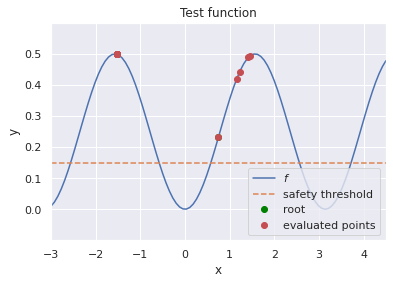

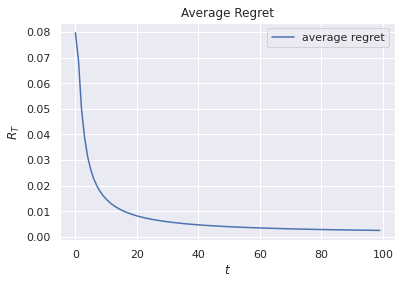

In [4]:
N = 4
sigma = 1.0
lam = 1e-10
gfun = lambda x: 1/sigma * x
v_1 = N#np.sqrt(N) 
rho =1/N
jmin = 0.15
kernel = RBF(sigma)
search_space = np.array([-3.0, 4.5]).reshape(-1, 2)
budget = 100
h_max = 5
t = 0
f = lambda x :  1/2 * np.sin(x)**2
lims = [-3.0, 4.5]
points = [np.mean(lims)]
#plot_fun(f, [np.mean(lims)], lims=lims)
options = OptimizerOptions(gfun, v_1 = v_1, rho=rho, lam=lam, noise_var = lam**2,\
         delta=0.025,
         qbar= 3,
         jmin=jmin,
         verbose=True)
opt = SafeAdaBKB(kernel, options)
opt.initialize(f, search_space, N, budget, h_max)
print("[--] Initialization done!")
c_reg = []
real_max = 0.5
while t < budget:
    xt, node_idx = opt.step()
    yt = f(xt)
    c_reg.append(np.abs(real_max - yt))
    print("[--] xt: {}\t yt: {}".format(xt,yt))
    points.append(xt[0])
    opt.update_model(node_idx, yt)
    t+=1
plot_fun(f, points, lims)
c_reg = np.cumsum(c_reg)
c_reg = [c_reg[t]/(t+1) for t in range(len(c_reg)) ]
plot_average_regret(c_reg)



In [5]:
N = 13
sigma =1.0
lam = 1e-3
gfun = lambda x: 1/sigma * x
v_1 = N 
rho =1/N
jmin = 1.05
kernel = RBF(sigma)
lims = [-0.50, 4.5]
search_space = np.array(lims).reshape(-1, 2)
budget = 100
h_max = None
t = 0
f = lambda x :  np.tanh(x) + 1/(np.pi**x)
points = [np.mean(lims)]
#plot_fun(f, [np.mean(lims)], lims=lims)
options = OptimizerOptions(gfun, v_1 = v_1, rho=rho, lam=lam, noise_var = lam**2,\
         delta=0.025,
         qbar= 3,
         jmin=jmin)
opt = SafeAdaBKB(kernel, options)
opt.initialize(f, search_space, N, budget, h_max)
avg_reg = []
real_max = 0.5
while t < budget:
    xt, node_idx = opt.step()
    yt = f(xt)
    avg_reg.append(np.abs(real_max - yt))
    print("[--] xt: {}\t yt: {}".format(xt,yt))
    points.append(xt[0])
    opt.update_model(node_idx, yt)
    t+=1
plot_fun(f, points, lims)
avg_reg = np.cumsum(avg_reg)
avg_reg = [avg_reg[t]/(t+1) for t in range(len(avg_reg)) ]
plot_average_regret(avg_reg)



TypeError: '<=' not supported between instances of 'int' and 'NoneType'